# Creating a Percepteron from scratch

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [44]:
#making line-sepratable datas with skleran
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=41)

In [45]:
#just for see the data as a table
df = pd.DataFrame(X, columns=[f'Feature_{i+1}' for i in range(X.shape[1])])
df['Cluster'] = y
df.head()

,Feature_1,Feature_2,Cluster
0,3.290597,-11.064549,1
1,2.786380,-8.780304,1
2,-5.772228,-9.248872,0
3,2.432490,-8.058176,1
4,4.268222,-10.097040,1


In [46]:
class F: #activation functions
  
  @staticmethod
  def sign(x): #the sign activation function
    if x > 0:
      return 1
    elif x < 0:
      return 0
    else:
      return -1
    
  @staticmethod
  def tanh(x): #the tanh activation function
      return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))

In [47]:
class Perceptron:
  def __init__(self, input_size):
    # Initialize the weights and biases of the new model
    self.weights = np.random.randn(input_size)
    self.bias = np.random.randn()

  def forward(self, input):
    # Feed input features to your model and return output
    return F.sign(np.dot(input, self.weights) + self.bias)

In [48]:
class Optimizer:
  def __init__(self, model):
    self.model = model

  def update(self, x, y, y_hat):
    # Update weight and bias of the model
      error = (y - y_hat)
      self.model.weights += 0.01 * error * x
      self.model.bias += 0.01 * error

In [72]:
input_size = X.shape[1] #number of features
perceptron = Perceptron(input_size)
optimizer = Optimizer(perceptron)

In [73]:
n_iter = 100
for _ in range(n_iter):
    for x, label in zip(X, y):  # Change made here
        y_hat = perceptron.forward(x)
        optimizer.update(x, label, y_hat)  # Use label instead of y

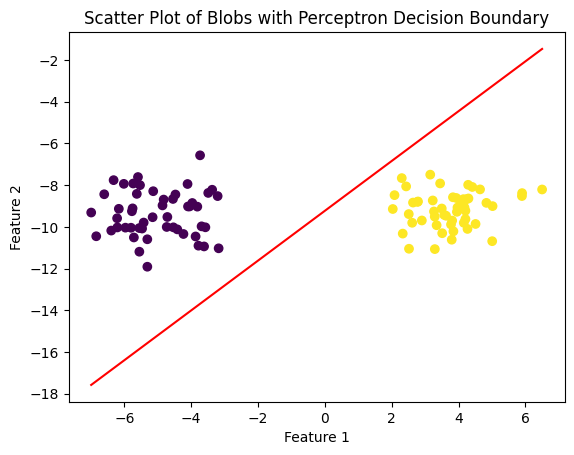

In [74]:
x_values = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
y_values = - (perceptron.weights[0] * x_values + perceptron.bias) / perceptron.weights[1]

plt.scatter(X[:,0], X[:,1], c=y)
plt.plot(x_values, y_values, color='red')
plt.title('Scatter Plot of Blobs with Perceptron Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()